<a href="https://colab.research.google.com/github/Danlof/Sentiment_Analysis/blob/main/irish_song_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text generation using irish songs

In [7]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2024-01-03 08:50:38--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.207, 173.194.217.207, 108.177.13.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2024-01-03 08:50:38 (132 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [14]:
# importing import libraries

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Bidirectional,Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [11]:
tokenizer = Tokenizer()

# loading the data
data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

# creating input sequences

input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# padding
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_len, padding='pre'))

# create predictors and labels
xs,labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [15]:
## modelling

model = Sequential()
model.add(Embedding(total_words,8))
model.add(Bidirectional(LSTM(max_sequence_len-1,return_sequences='True')))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

history= model.fit(xs,ys,epochs=1000,verbose=1)

Epoch 1/1000
377/377 [==============================] - 19s 30ms/step - loss: 6.8471 - accuracy: 0.0648
Epoch 2/1000
377/377 [==============================] - 11s 28ms/step - loss: 6.4031 - accuracy: 0.0657
Epoch 3/1000
377/377 [==============================] - 9s 25ms/step - loss: 6.2953 - accuracy: 0.0657
Epoch 4/1000
377/377 [==============================] - 12s 31ms/step - loss: 6.2172 - accuracy: 0.0673
Epoch 5/1000
377/377 [==============================] - 12s 32ms/step - loss: 6.1392 - accuracy: 0.0704
Epoch 6/1000
377/377 [==============================] - 12s 32ms/step - loss: 6.0697 - accuracy: 0.0728
Epoch 7/1000
377/377 [==============================] - 17s 44ms/step - loss: 6.0125 - accuracy: 0.0731
Epoch 8/1000
377/377 [==============================] - 12s 31ms/step - loss: 5.9617 - accuracy: 0.0758
Epoch 9/1000
377/377 [==============================] - 15s 41ms/step - loss: 5.9096 - accuracy: 0.0802
Epoch 10/1000
377/377 [==============================] - 14s 38ms

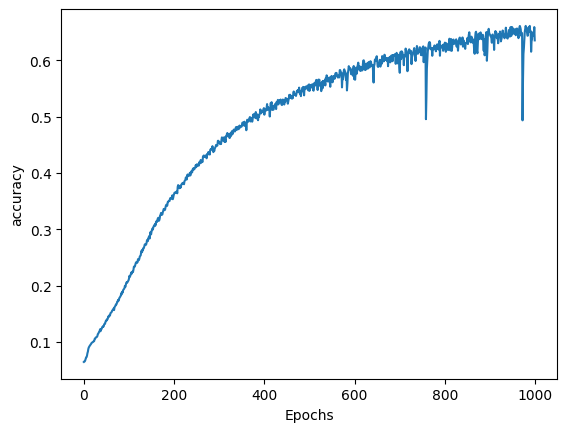

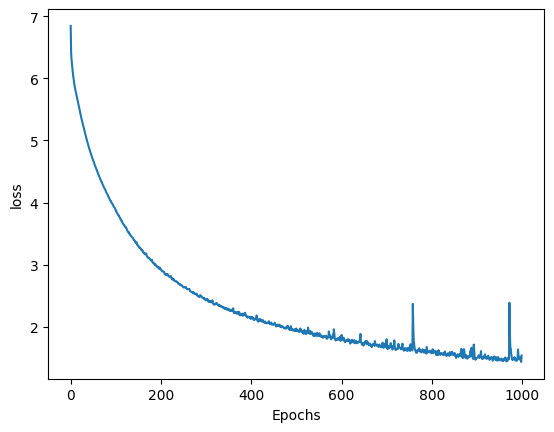

In [16]:
# model evaluation
import matplotlib.pyplot as plt

def evaluation_graphs(history,string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

evaluation_graphs(history,'accuracy')
evaluation_graphs(history,'loss')




In [17]:
# testing

seed_text = 'it was the best of times'

next_words = 100


for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_sequence_len-1, padding='pre')
  predicted = np.argmax(model.predict(token_list),axis=-1)
  output_word = ""

  for word,index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break

  seed_text += " " + output_word

print(seed_text)


1/1 [==============================] - 0s 23ms/step
it was the best of times come to spend for last so spancil hiii he treads joy and his bow trace weel he tiny resemble pepper grew shines fray mine ringlets inside resemble valley will watch rise parting leaps valleys stuck beneath foolish of captain night you must ye meet you always moment sends sinking beneath ringing my edward above she rarely my town enthralled thee more chirping for now this old times fall upon a equality flood her native dawn entwine brand hardship last graceful by the wall times skin you long early and pray find me to the dark flowing dawn their friend son
